In [1]:
import numpy as np
import pickle
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import sys
from scipy.interpolate import griddata
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.colorbar
from matplotlib import rc
from scipy.optimize import fsolve
from scipy.integrate import simpson
from numpy import trapz
from numpy.polynomial.polynomial import polyfit
from scipy import integrate
from matplotlib.pyplot import cm

In [2]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx,array[idx]

In [3]:
def k_point_grid_upper_half_bz(N):
    K_label = []
    Kx = []
    Ky = []
    x_span = int((int(N))/2)+1
    k_pair = 0
    for i in range(x_span):
        for j in range(x_span):
            if(j>=i):
              K_label.append(k_pair)
              Kx.append(i)
              Ky.append(j)
              k_pair = k_pair+1

              
    BZ = np.stack((K_label,Kx,Ky),axis = 1)
    
    return BZ,k_pair

In [4]:
def bz_cons(N,Graph_dir_LDOS):
   
   bz,k_pairs = k_point_grid_upper_half_bz(N)


   k_label_0 = bz[:,0]
   Kx_grid_0 = bz[:,1]
   Ky_grid_0 = bz[:,2]

   k_label_1 = []
   Kx_grid_1 = []
   Ky_grid_1 = []


   for ii in range(len(k_label_0)):

       if(Kx_grid_0[ii] != Ky_grid_0[ii]):
          kx = int(Ky_grid_0[ii])
          ky = int(Kx_grid_0[ii])
          Kx_grid_1.append(round(kx,1))
          Ky_grid_1.append(round(ky,1))
          k_label_1.append(k_label_0[ii])

   k_label_2 = np.append(k_label_0,np.array(k_label_1))
   Kx_grid_2 = np.append(Kx_grid_0,np.array(Kx_grid_1))
   Ky_grid_2 = np.append(Ky_grid_0,np.array(Ky_grid_1))
   
   k_label_3 = []
   Kx_grid_3 = []
   Ky_grid_3 = []
   
   k_label_4 = []
   Kx_grid_4 = []
   Ky_grid_4 = []

   k_label_5 = []
   Kx_grid_5 = []
   Ky_grid_5 = []
   
   
   for ii in range(len(k_label_2)):
       if Ky_grid_2[ii] > 0:
          kx_3 = round(np.cos(np.pi/2)*Kx_grid_2[ii]-np.sin(np.pi/2)*Ky_grid_2[ii],1)
          ky_3 = round(np.sin(np.pi/2)*Kx_grid_2[ii]+np.cos(np.pi/2)*Ky_grid_2[ii],1)
          k_label_3.append(k_label_2[ii])
          Kx_grid_3.append(kx_3)
          Ky_grid_3.append(ky_3)

       if Ky_grid_2[ii] > 0:
          kx_4 = round(np.cos(np.pi)*Kx_grid_2[ii]-np.sin(np.pi)*Ky_grid_2[ii],1)
          ky_4 = round(np.sin(np.pi)*Kx_grid_2[ii]+np.cos(np.pi)*Ky_grid_2[ii],1)
          k_label_4.append(k_label_2[ii])
          Kx_grid_4.append(kx_4)
          Ky_grid_4.append(ky_4)
  
       if Ky_grid_2[ii] > 0 and Kx_grid_2[ii] > 0:
          kx_5 = round(np.cos(1.5*np.pi)*Kx_grid_2[ii]-np.sin(1.5*np.pi)*Ky_grid_2[ii],1)
          ky_5 = round(np.sin(1.5*np.pi)*Kx_grid_2[ii]+np.cos(1.5*np.pi)*Ky_grid_2[ii],1)
          k_label_5.append(k_label_2[ii])
          Kx_grid_5.append(kx_5)
          Ky_grid_5.append(ky_5)
          
   k_label = np.append(k_label_2,np.append(np.array(k_label_3),np.append(np.array(k_label_4),np.array(k_label_5))))
   Kx_grid = np.append(Kx_grid_2,np.append(np.array(Kx_grid_3),np.append(np.array(Kx_grid_4),np.array(Kx_grid_5))))
   Ky_grid = np.append(Ky_grid_2,np.append(np.array(Ky_grid_3),np.append(np.array(Ky_grid_4),np.array(Ky_grid_5))))
   
   k_label_bz = []
   Kx_grid_bz = []
   Ky_grid_bz = []
   
   for i in range(len(k_label)):
       #print(Kx_grid,Ky_grid)
       if Kx_grid[i] > -1*int(int(N)/2) and Ky_grid[i] > -1*int(int(N)/2):
             k_label_bz.append(k_label[i])
             Kx_grid_bz.append(Kx_grid[i])
             Ky_grid_bz.append(Ky_grid[i])
          
       
   #cm = matplotlib.colormaps.get_cmap('plasma')
   
   #plt.figure(figsize = (20,20))
   #ax = plt.gca()
   #plt.xlabel('Kx',fontsize = 40)
   #plt.ylabel('Ky',fontsize = 40)
   #scat = plt.scatter(Kx_grid_bz,Ky_grid_bz,marker = "s",s = 5000)
   #plt.xticks(fontsize = 40)
   #plt.yticks(fontsize = 40)
   #divider = make_axes_locatable(ax)
   #cax = divider.append_axes("right", size="5%", pad=0.05)
   #cbar = plt.colorbar(scat, cax= cax)
   #cbar.ax.tick_params(labelsize = 30)
   #for i, txt in enumerate(k_label_bz):
   #    ax.annotate(txt, (Kx_grid_bz[i], Ky_grid_bz[i]))
   
   #plt.savefig('%s/Brillouin_zone_N_%s_scatter.png'%(Graph_dir_LDOS,N))
   #print(len(k_label_bz),"k_list_length")
   
   return k_label_bz,Kx_grid_bz,Ky_grid_bz

In [5]:
def spectral_function_LDOS_plot_real_space_v2(Text_dir_ac_main,Graph_dir_LDOS,freq_no,N,U,Mu,Trot,dtau,omega_max,omega_min):
       
   Omega_gauss = np.zeros((len(U),freq_no,len(Trot)))
   LDOS_gauss = np.zeros((len(U),freq_no,len(Trot)))
   N_0_gauss = np.zeros((len(U),len(Trot)))
   LE_DOS_gauss = np.zeros((len(U),len(Trot)))
   Sum_rule = np.zeros((len(U),len(Trot)))
    
   start_ind = int(freq_no/2)-1001
   end_ind = int(freq_no/2)+1000 
   U_val =  np.zeros(len(U))
   Tc = np.zeros(len(U)) 
   for i in range(len(U)):
       U_val[i] = float(U[i])
       for k in range(len(Trot)):
           Text_dir_gf_r_avg_ac_main = "%s/Text_files_N_%s_U_%s_dtau_%s/Mu_%s/dtau_%s_L_%s/Spectral_functions_uniform_nfreq_%s"%(Text_dir_ac_main,N,U[i],dtau,Mu,dtau,Trot[k],freq_no)
           filename_spec_r = "%s/r_point_0/Spectral_function_real_space_avg_N_%s_U_%s_mu_%s_dtau_%s_L_%s_r_label_0_uniform_nfreq_%s_omega_max_%s_omega_min_%s.dat"%(Text_dir_gf_r_avg_ac_main,N,U[i],Mu,dtau,Trot[k],str(freq_no),omega_max,omega_min)
           Omega_gauss[i,:,k],LDOS_gauss[i,:,k] = np.loadtxt(filename_spec_r,unpack=True,usecols=[0,1])
           zero_ind,zero_val = find_nearest(Omega_gauss[i,:,k], 0.00000001)
           start_val = Omega_gauss[i,start_ind,k]
           end_val = Omega_gauss[i,end_ind,k]
               #print(start_val,end_val)
           LE_DOS_gauss[i][k] = (1/(end_val-start_val))*integrate.trapz(LDOS_gauss[i,start_ind:end_ind+1,k],Omega_gauss[i,start_ind:end_ind+1,k])
           N_0_gauss[i][k] = 0.5*(LDOS_gauss[i,zero_ind-1,k]+LDOS_gauss[i,zero_ind,k])
           Sum_rule[i,k] = integrate.trapz(LDOS_gauss[i,:,k],Omega_gauss[i,:,k])
           
   #Omega_mesh,U_mesh = np.meshgrid(Omega,U_val,indexing = 'xy')

   Graph_dir_LDOS_T_comp = "%s/LDOS_vs_T"%(Graph_dir_LDOS)
   if not os.path.exists(Graph_dir_LDOS_T_comp):
        os.makedirs(Graph_dir_LDOS_T_comp)

   Graph_dir_LDOS_U_comp = "%s/LDOS_vs_U"%(Graph_dir_LDOS)
   if not os.path.exists(Graph_dir_LDOS_U_comp):
        os.makedirs(Graph_dir_LDOS_U_comp)    
       
   T_val = np.zeros(len(Trot))
    
   for k in range(len(Trot)):
       beta = float(dtau)*float(Trot[k])
       T_val[k] = 1/beta

       plt.figure(figsize = (25,20))
       plt.title(r"$N(\omega), N = %sx%s, \beta = %s, mu = %s$"%(N,N,str(round(beta,3)),Mu),fontsize = 40)
       ax = plt.gca()
       plt.ylabel(r"$N(\omega)$",fontsize = 40)
       plt.xlabel(r"$\omega$",fontsize = 40)
       plt.yticks(fontsize = 40)
       plt.xticks(fontsize = 40)
       c1 = iter(cm.tab20(np.linspace(0, 1, len(U)+1))) #T_val = np.zeros(len(Trot))

       for i in range(len(U)):
           plt.plot(Omega_gauss[i,:,k],LDOS_gauss[i,:,k],color = next(c1),marker = "o",markersize = 5,label = "U=%s"%(U[i]))
       plt.legend(loc = 'best',fontsize = 40)
       plt.grid('True',which='both')
       plt.xlim(-10.0,10.0)
       plt.savefig('%s/Uniform_LDOS_N_%s_mu_%s_dtau_%s_L_%s_omega_max_%s_omega_min_%s.png'%(Graph_dir_LDOS_U_comp,N,Mu,dtau,Trot[k],omega_max,omega_min))
       plt.close()

   for i in range(len(U)):
       #beta = float(dtau)*float(Trot[k])
       #T_val[k] = 1/beta

       plt.figure(figsize = (25,20))
       plt.title(r"$N(\omega), N = %sx%s, U = %s, mu = %s$"%(N,N,U[i],Mu),fontsize = 40)
       ax = plt.gca()
       plt.xlim(0,5)
       plt.ylim(0.00,0.20)
       plt.ylabel(r"$N(\omega)$",fontsize = 40)
       plt.xlabel(r"$\omega$",fontsize = 40)
       plt.yticks(fontsize = 40)
       plt.xticks(fontsize = 40)
       c1 = iter(cm.tab20(np.linspace(0, 1, len(Trot)+1))) #T_val = np.zeros(len(Trot))

       for k in range(len(Trot)):
           plt.plot(Omega_gauss[i,:,k],LDOS_gauss[i,:,k],color = next(c1),marker = "o",markersize = 5,label = "T=%s"%str(round(T_val[k],3)))
       plt.legend(loc = 'best',ncol=4,fontsize = 40)
       plt.grid('True',which='both')
       plt.savefig('%s/Uniform_LDOS_N_%s_U_%s_mu_%s_dtau_%s_omega_max_%s_omega_min_%s.png'%(Graph_dir_LDOS_T_comp,N,U[i],Mu,dtau,omega_max,omega_min))
       plt.close()
       
   Omega_cut = str(round(end_val,4))
   plt.figure(figsize = (25,20))
   plt.xticks(fontsize = 80)
   plt.yticks(fontsize = 80)
   plt.title(r"LEDOS, $\Omega_c = %s$"%Omega_cut,fontsize = 60)    
   for i in range(len(U)):
        plt.plot(T_val,LE_DOS_gauss[i,:],marker = "o",markersize = 20, label = "U=%s"%U[i])
   plt.grid(True,which='both')
   plt.legend(loc = 'best',fontsize = 40)
   plt.savefig("%s/LEDOS_maxent_uniform_N_%s_dtau_%s_omega_cutoff_%s.png"%(Graph_dir_LDOS,N,dtau,Omega_cut))


   n_order = 4 
   Omega_cut = str(round(end_val,4))
   plt.figure(figsize = (25,20))
   plt.xticks(fontsize = 80)
   plt.yticks(fontsize = 80)
   plt.title(r"LEDOS, $\Omega_c = %s$"%Omega_cut,fontsize = 60)    
   T_fit = np.linspace(np.nanmin(T_val),np.nanmax(T_val),num = 101) 
   for i in range(0,len(U),4):
        coeff = np.polyfit(T_val,LE_DOS_gauss[i,:],n_order)
        polynomial = np.poly1d(coeff)
        plt.plot(T_val,LE_DOS_gauss[i,:],marker = "o",markersize = 20, label = "U=%s,QMC"%U[i])
        plt.plot(T_fit,polynomial(T_fit),linewidth=3, label = "U=%s,fit"%U[i])
   plt.grid(True,which='both')
   plt.legend(loc = 'best',fontsize = 40)
   plt.savefig("%s/LEDOS_inset_with_fit_maxent_uniform_N_%s_dtau_%s_omega_cutoff_%s_fit_order_%s.png"%(Graph_dir_LDOS,N,dtau,Omega_cut,str(n_order)))


    
   plt.figure(figsize = (25,20))
   plt.xticks(fontsize = 80)
   plt.yticks(fontsize = 80)
   plt.title(r"LEDOS, $\Omega_c = %s$"%Omega_cut,fontsize = 60)    
   for i in range(len(U)):
        plt.plot(T_val,N_0_gauss[i,:],marker = "o",markersize = 20, label = "U=%s"%U[i])
   plt.grid(True,which='both')
   plt.legend(loc = 'best',fontsize = 40)
   plt.savefig("%s/N0_maxent_uniform_N_%s_dtau_%s.png"%(Graph_dir_LDOS,N,dtau))#

   #figure = plt.figure()
   #axes = figure.add_subplot(111)

   #print(Sum_rule) 
# using the matshow() function 
   #caxes = axes.matshow(Sum_rule, interpolation ='nearest')
   #figure.colorbar(caxes)
 
   #axes.set_xticklabels(Trot)
   #axes.set_yticklabels(U)
   #plt.savefig("%s/Sum_rule_lorentzian_gamma_%s_N_%s_datu_%s.png"%(Graph_dir_LDOS,gamma,N,dtau))





In [10]:
def main():

    N = "10"
    Dtau = "0.05"
    Omega_max = "25.0"
    Omega_min = "-25.0"
    Freq_no = 2501
    
    U = ["5.10","5.20","5.30","5.40","5.50","5.60","5.70","5.75"] #:wq,"8.00","8.50","9.00","9.50","10.00"]
    Mu = "0.00"
    Trot = ["20","22","24","26","28","30","32","34","36","38","40"] #,"42","44","46","48","50","52","54","56","60"] #,"62"]



    Text_dir_ac_main = "/Users/roy.369/Documents/Cold_atom_correlators/FHM_Legacy_data/FHM_Roy_data/Text_files/Text_files_N_%s_analytic_continuation"%N
       
    Graph_dir_ac_LDOS = "/Users/roy.369/Documents/Cold_atom_correlators/FHM_Legacy_data/FHM_Roy_data/Graphs/Graphs_N_%s_maxent/Graphs_N_%s_dtau_%s_maxent_LDOS_half_filling_plots/Density_of_states_uniform_default_model_omega_max_%s_omega_min_%s"%(N,N,Dtau,Omega_max,Omega_min)
    if not os.path.exists(Graph_dir_ac_LDOS):
        os.makedirs(Graph_dir_ac_LDOS)
        
    Klab, Kx_cord,Ky_cord  = bz_cons(N,Graph_dir_ac_LDOS)
    spectral_function_LDOS_plot_real_space_v2(Text_dir_ac_main,Graph_dir_ac_LDOS,Freq_no,N,U,Mu,Trot,Dtau,Omega_max,Omega_min)
     
        #spectral_function_LDOS_plot_v2(Text_dir_ac_main,Graph_dir_ac_LDOS,Freq_no,Sigma[h],N,U,Mu,Trot,Dtau,Omega_max,Omega_min,Klab)
        #spectral_function_LDOS_gap(Text_dir_ac_main,Graph_dir_ac_LDOS,Freq_no,Sigma[h],N,U,Mu,Trot,Dtau,Omega_max,Omega_min,Klab)

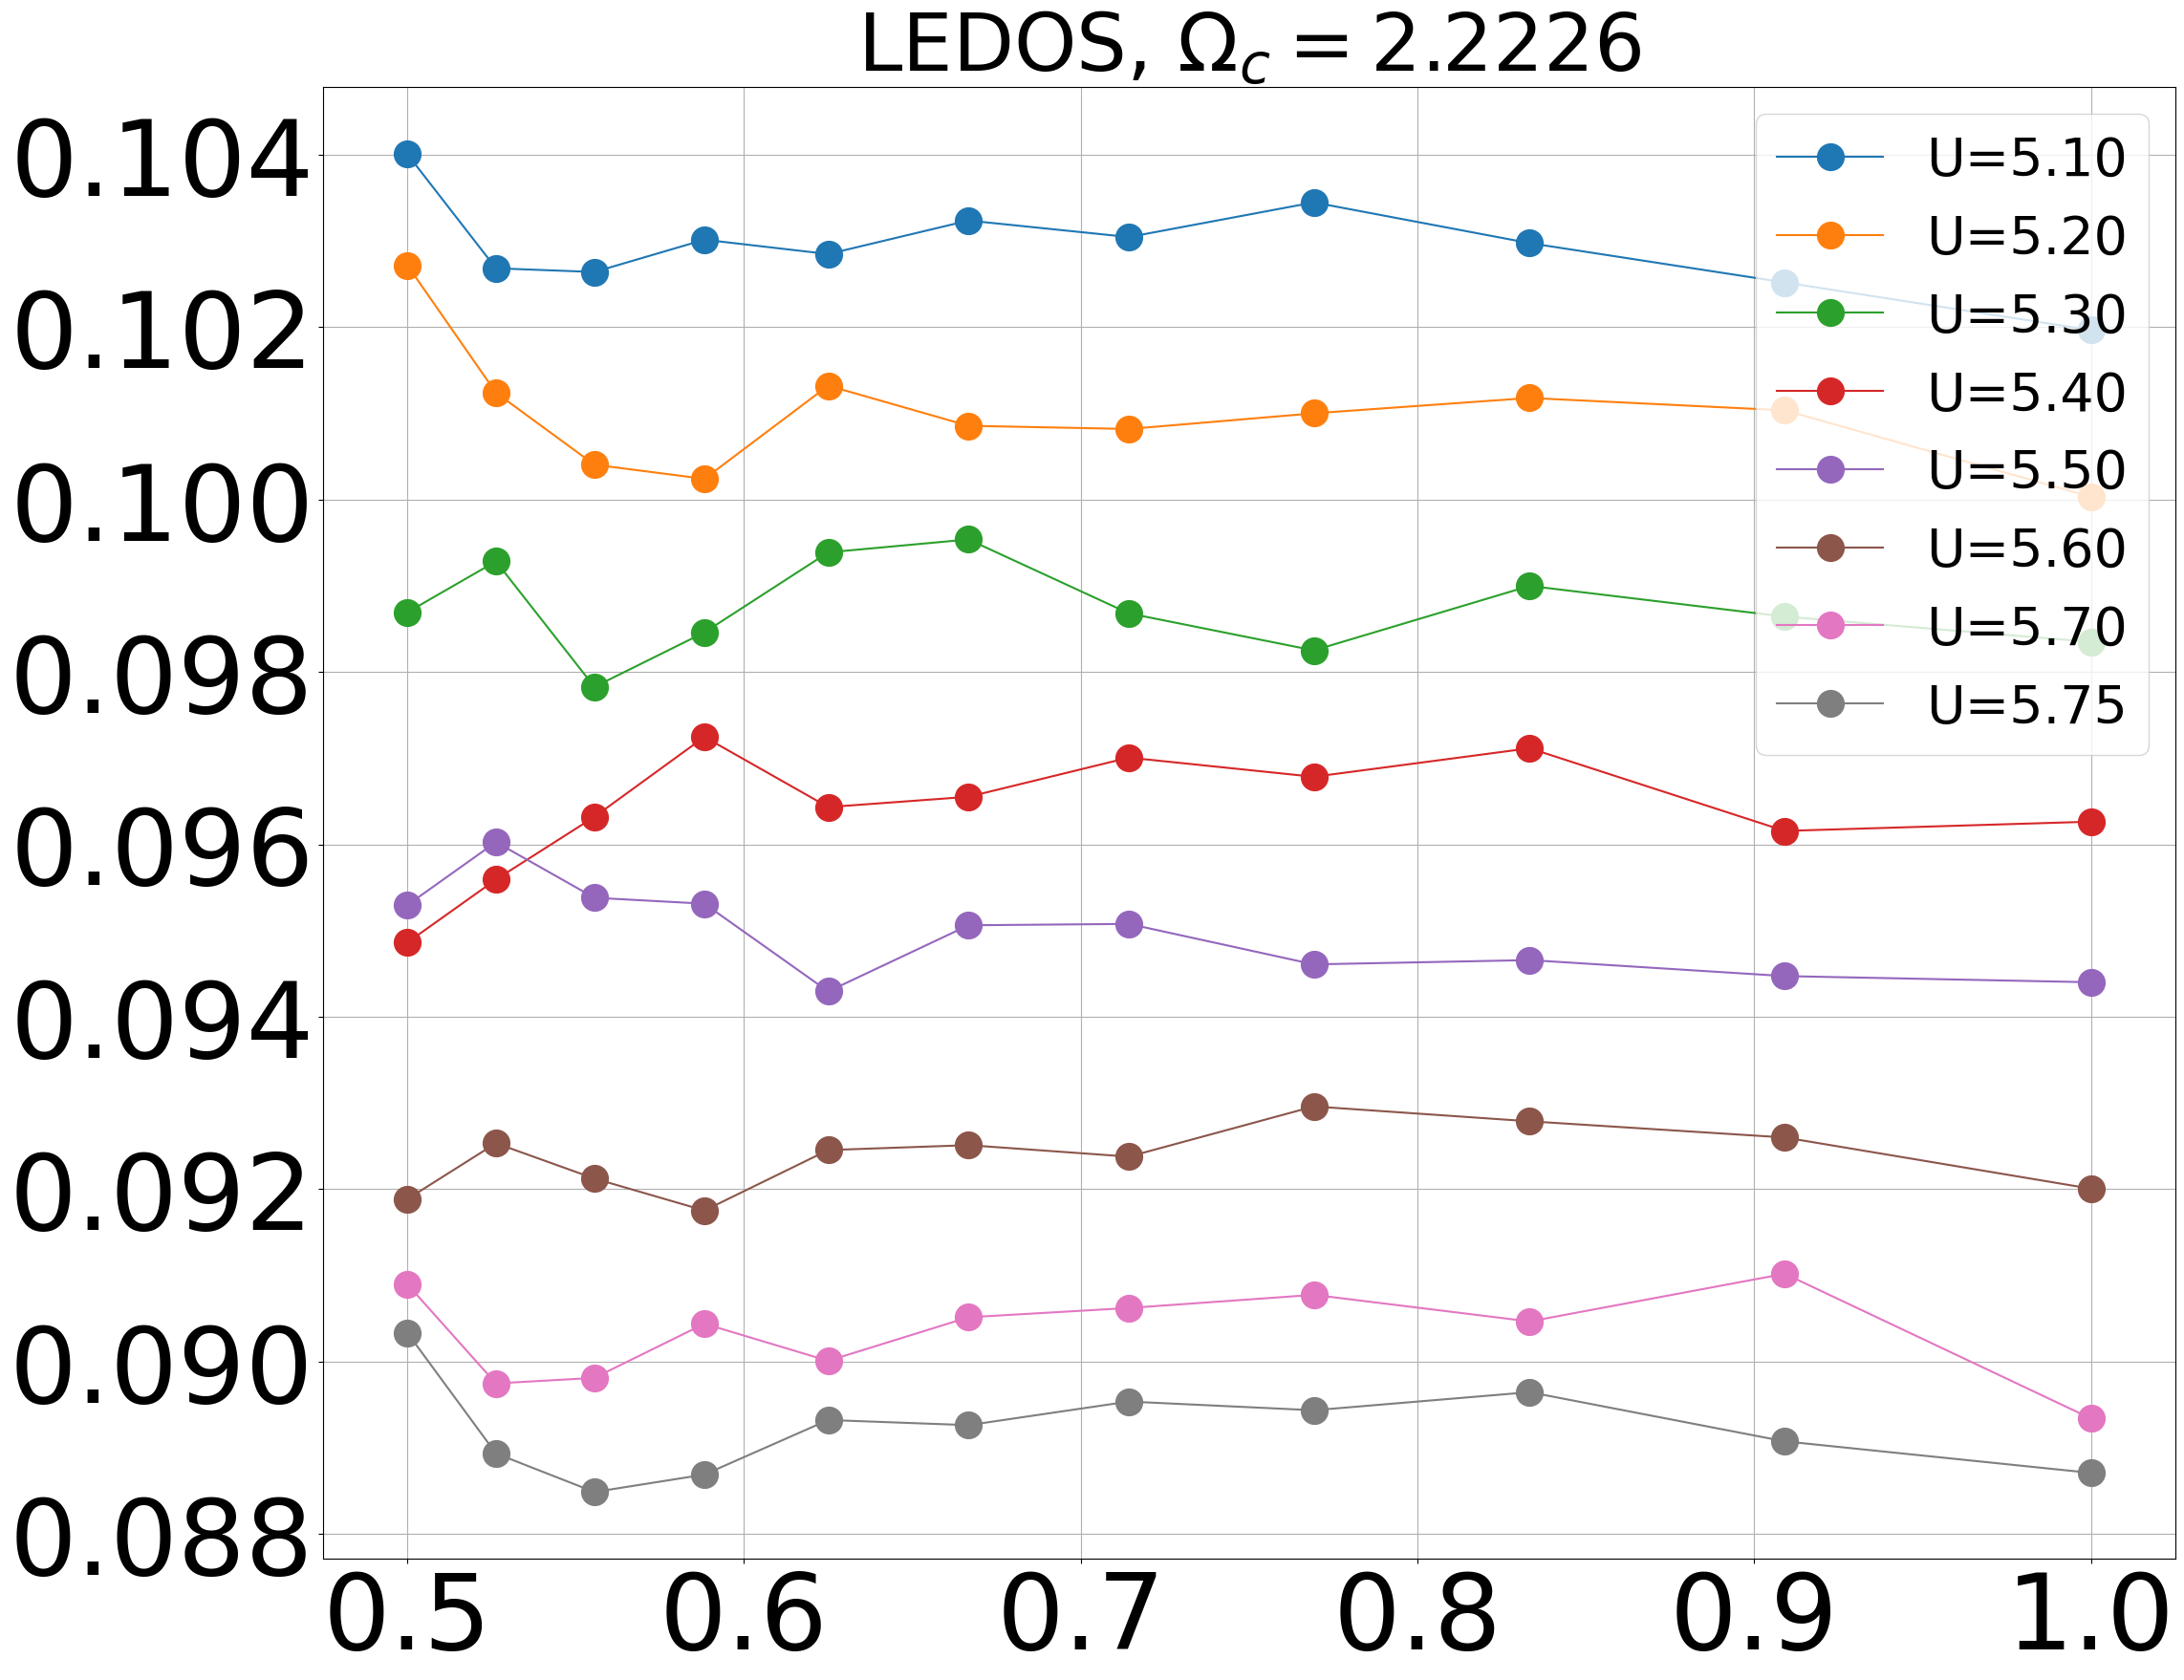

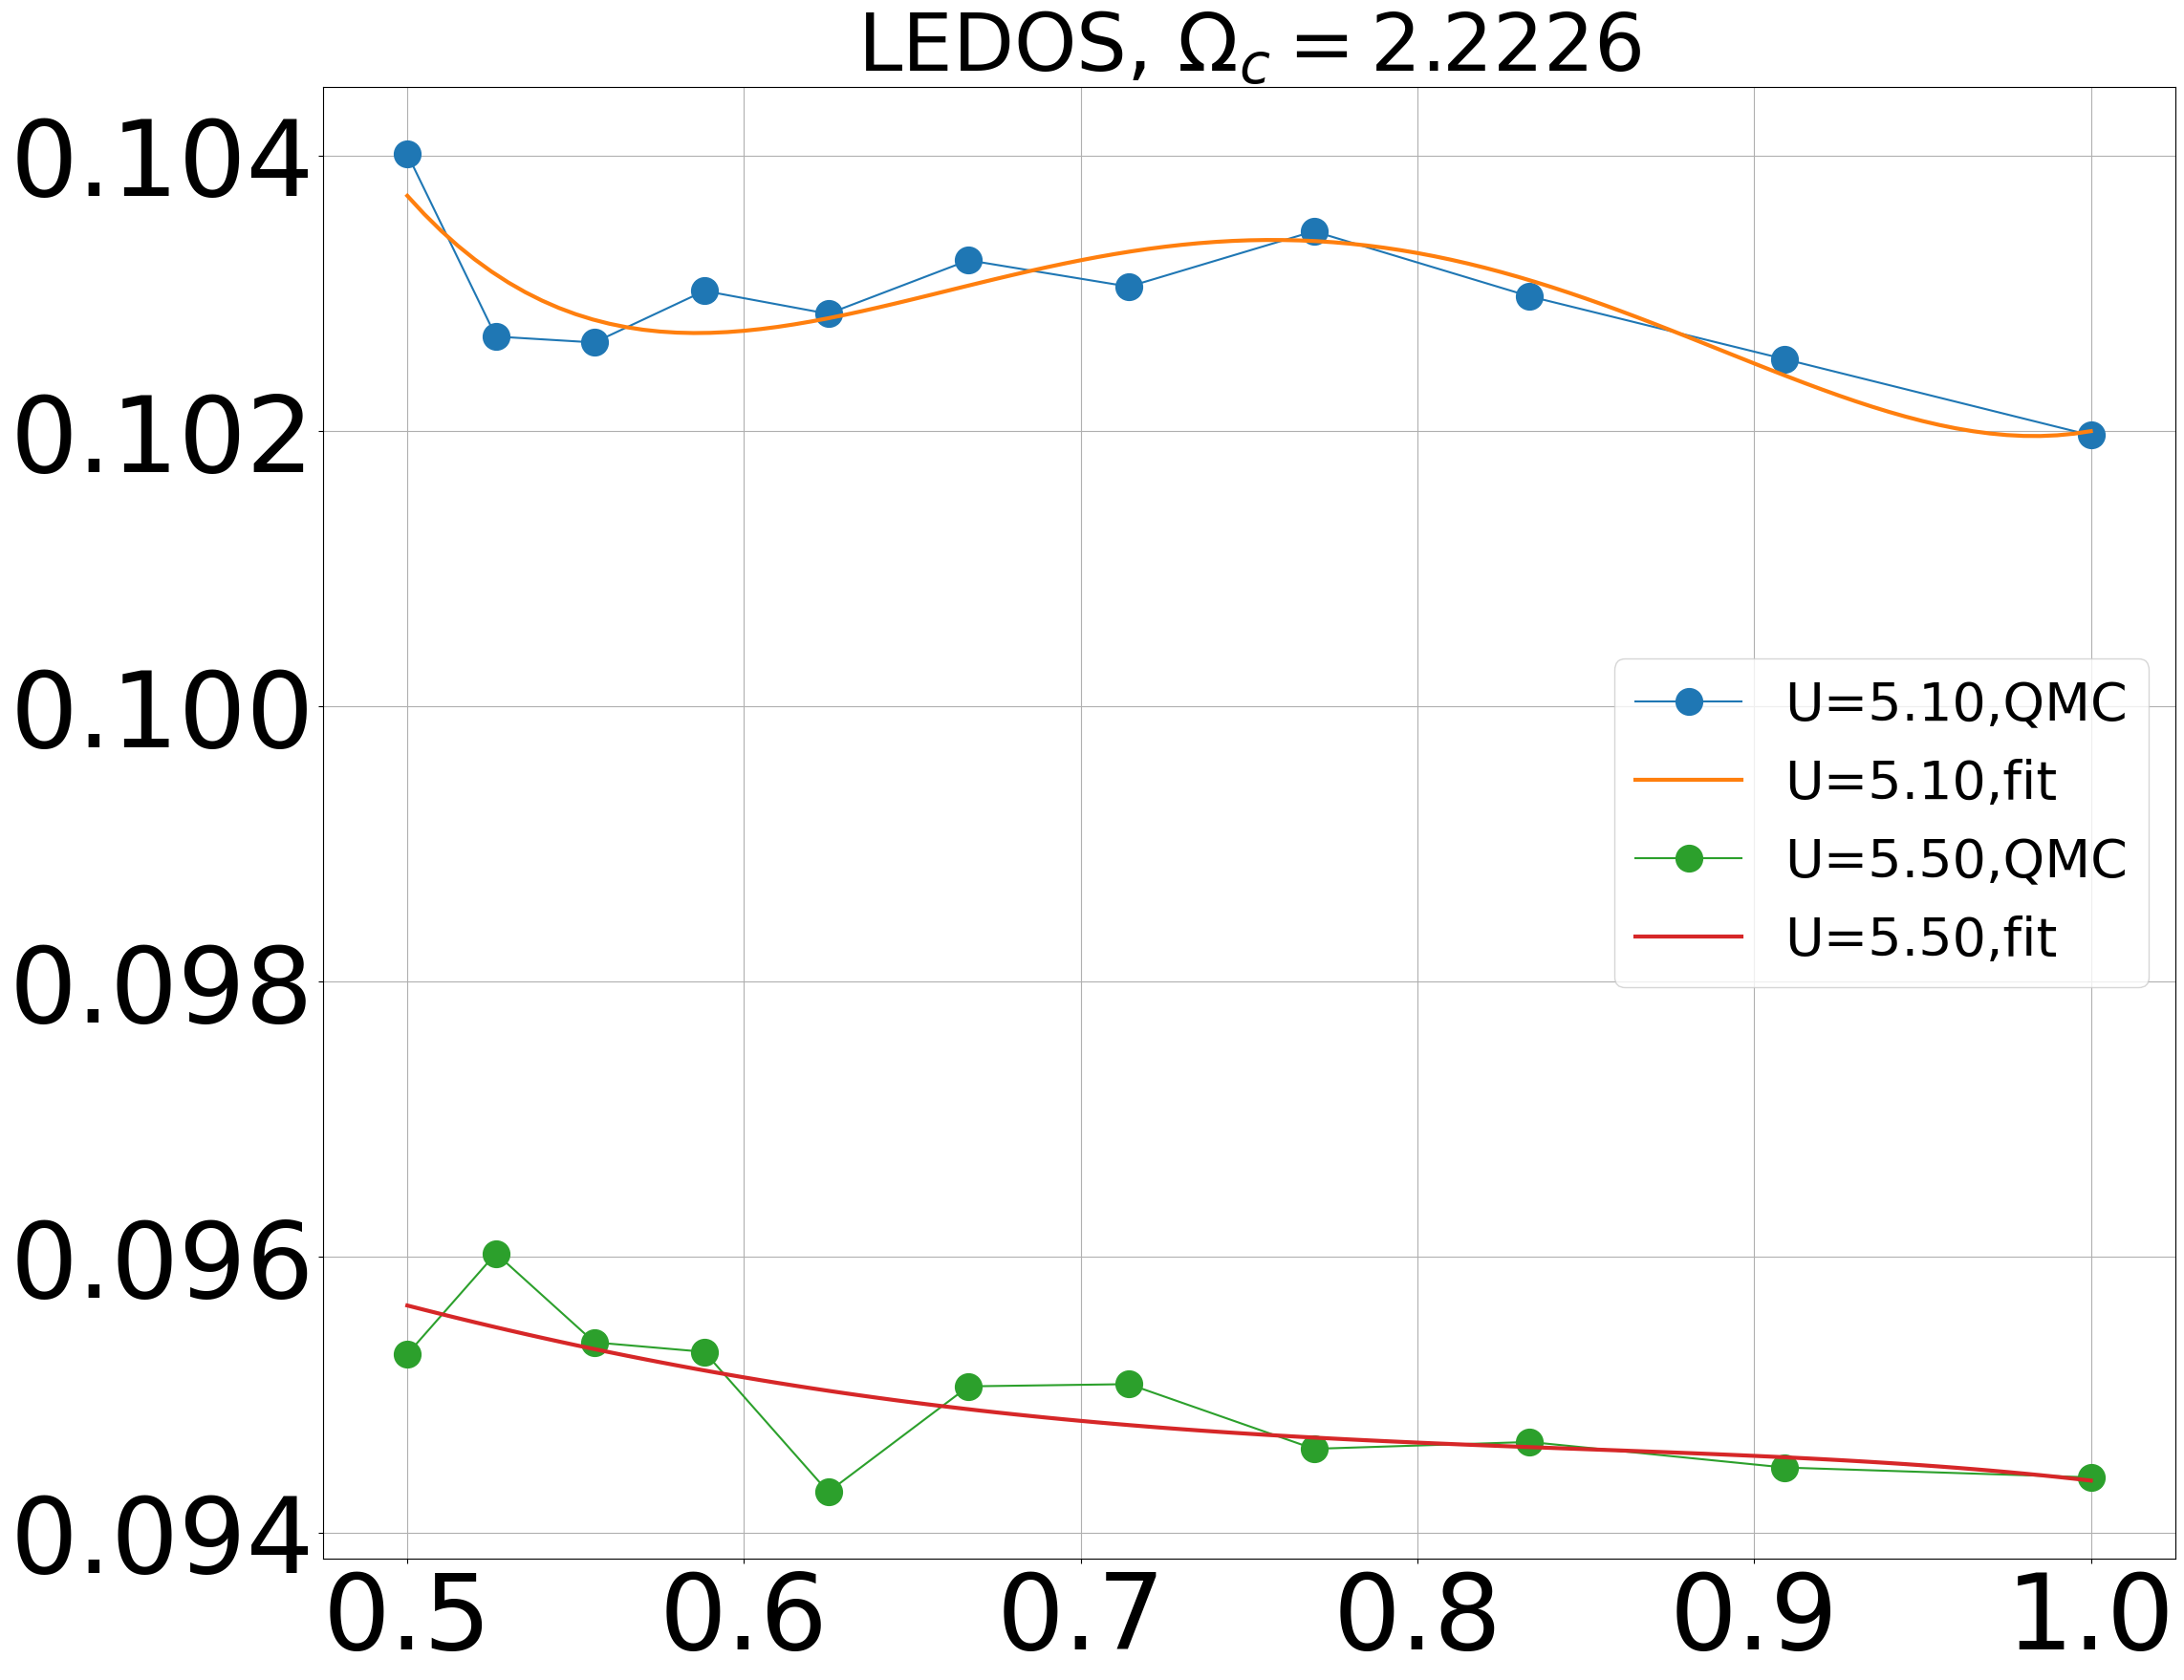

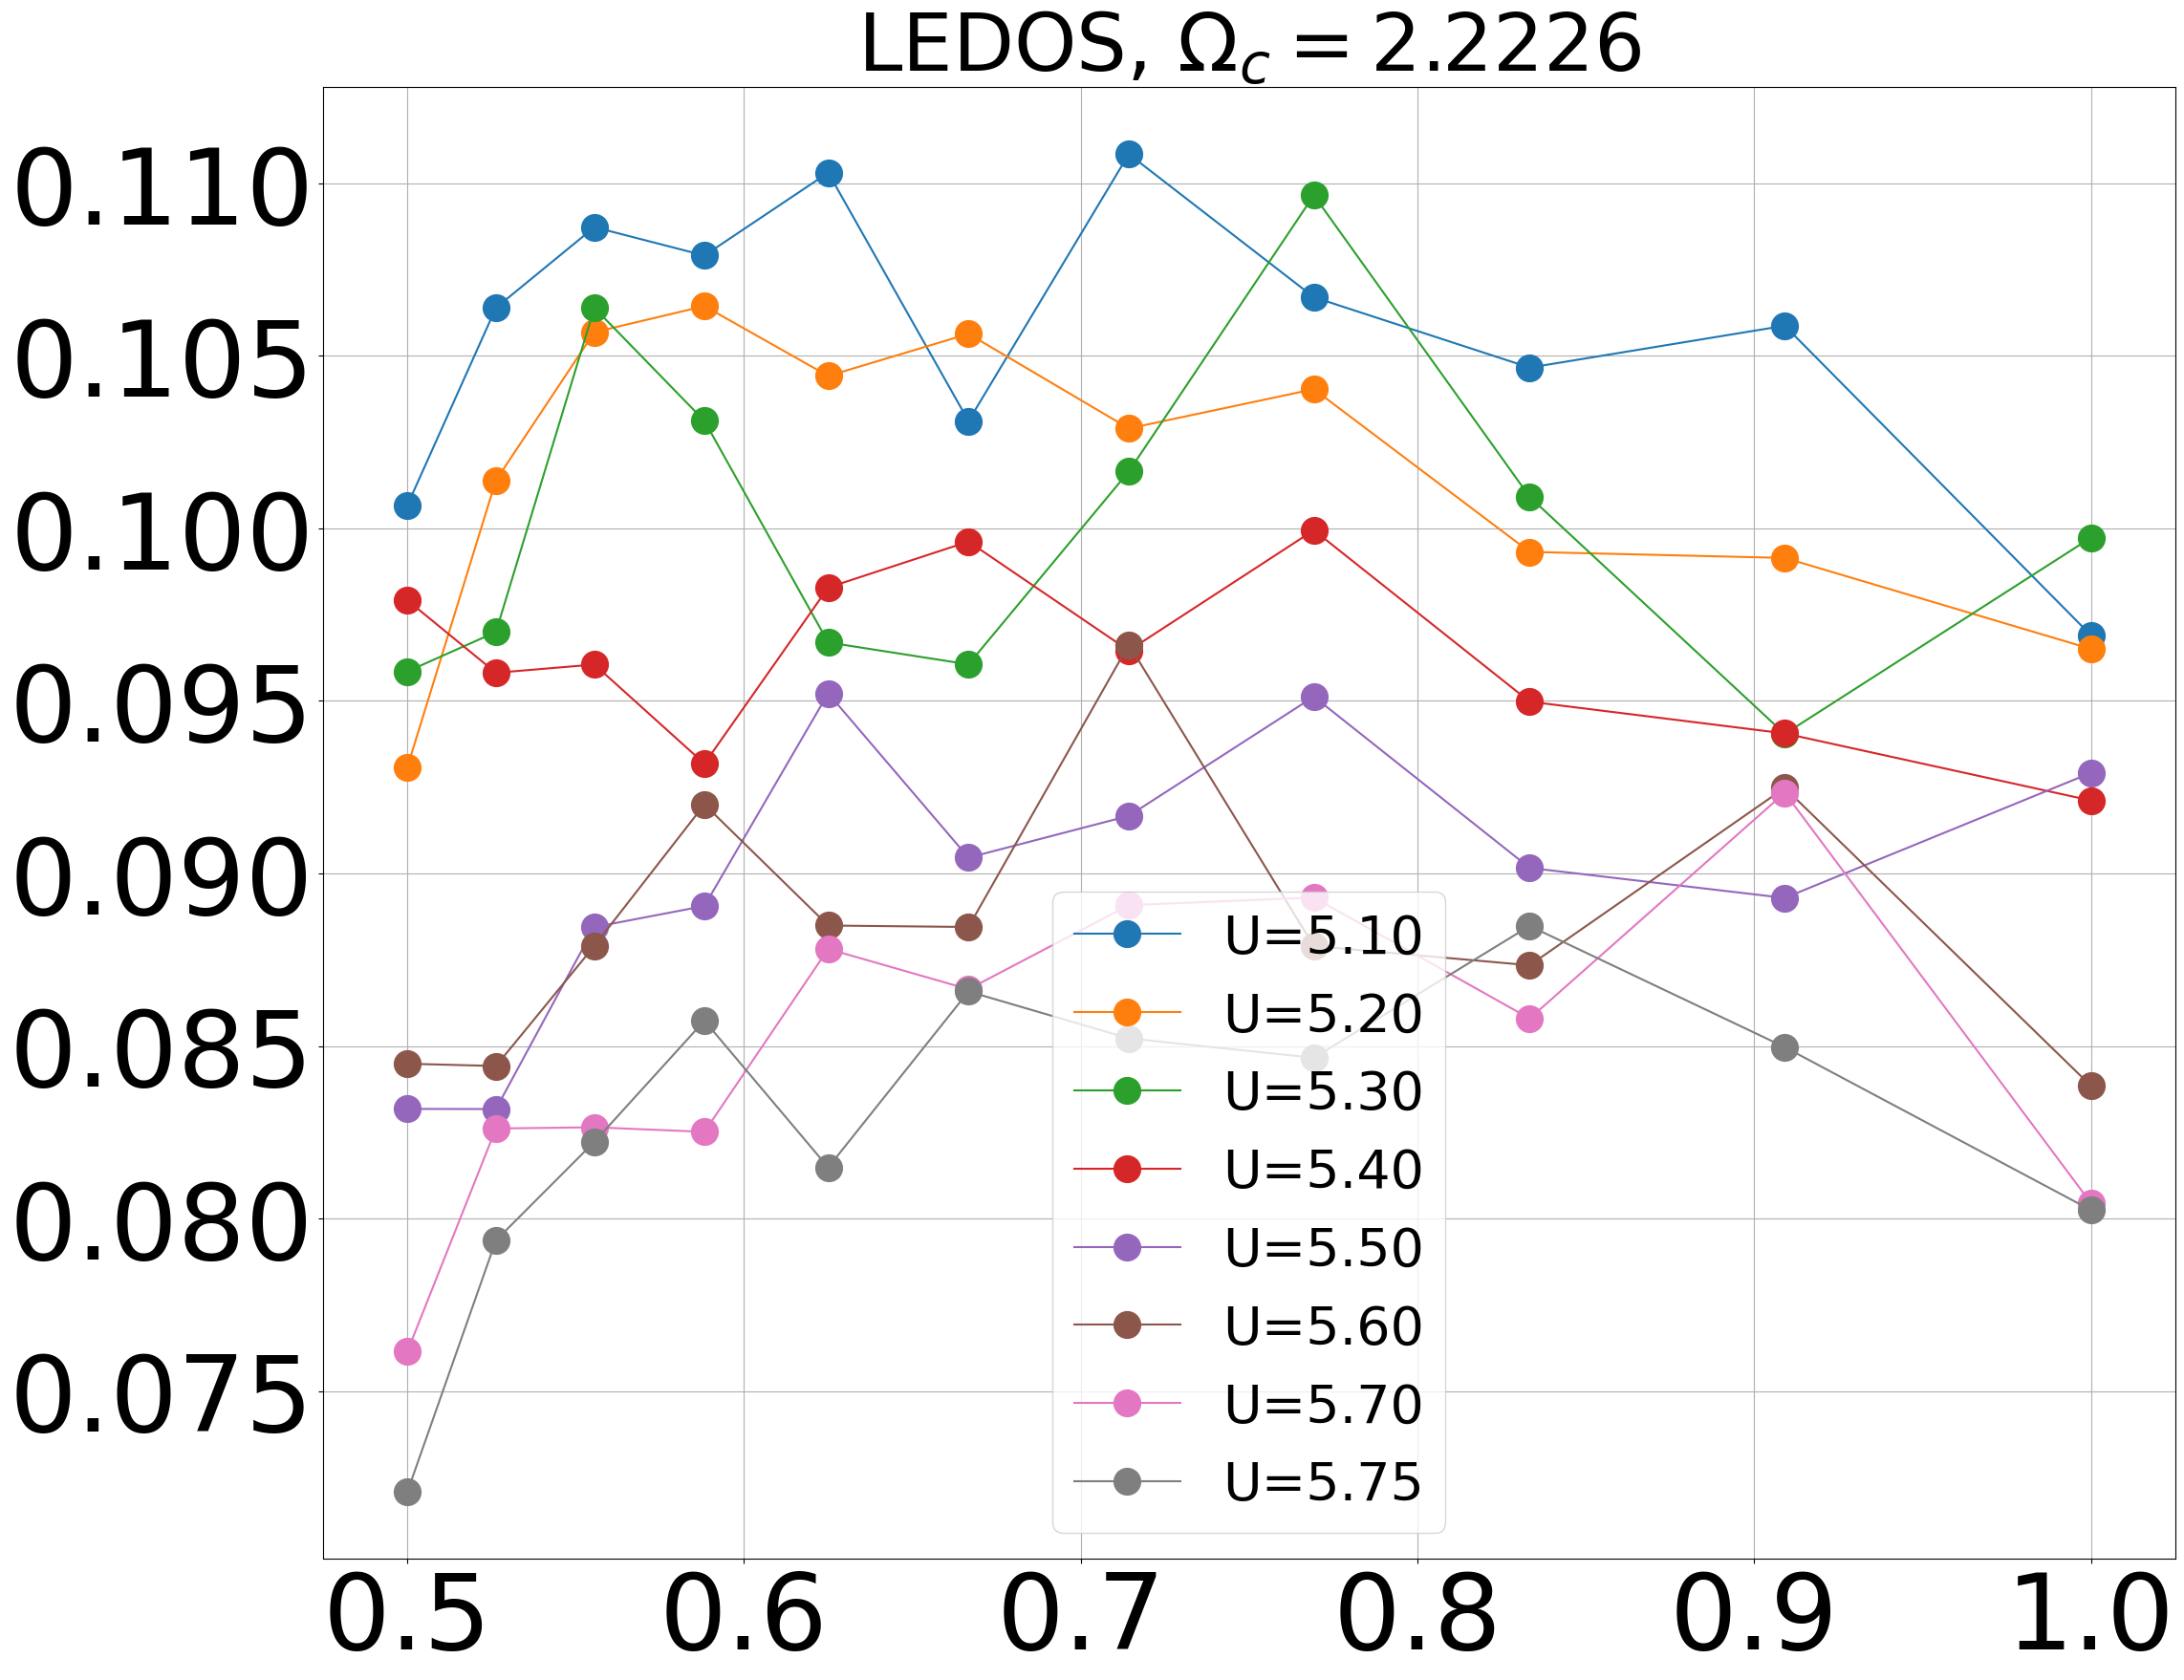

In [11]:
main()